In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
##import worksheets

project_data = pd.read_excel('../data/TEIS-NSS Project Data 10-2022.xlsx', 
                             sheet_name=['ECO with Exit21-22', 'Elig Timeline Rpt 2018-2022'])

eco_exit = project_data.get('ECO with Exit21-22')
elig_timeline = project_data.get('Elig Timeline Rpt 2018-2022')


In [3]:
eco_exit = eco_exit[['DISTRICT', 'CHILD_ID', 'ECO_Entry_DATE', 'Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'ECO_Exit_DATE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE', 'Days btw I-IFSP to Exit ECO']]
eco_exit

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Days btw I-IFSP to Exit ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,-44434.0
...,...,...,...,...,...,...,...,...,...,...,...
8631,UC,514216.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,-44537.0
8632,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8633,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8634,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
##rename columns
eco_exit = eco_exit.rename(columns={'DISTRICT':'district',
                                    'CHILD_ID':'child_id',
                                    'ECO_Entry_DATE':'eco_entry_date',
                                    'Ent SOCIAL_SCALE':'ent_social',
                                    'Ent KNOWLEDGE_SCALE':'ent_knowledge',
                                    'Ent APPROPRIATE_ACTION_SCALE':'ent_approp_action',
                                    'ECO_Exit_DATE':'eco_exit_date',
                                    'Exit SOCIAL_SCALE':'exit_social',
                                    'Exit KNOWLEDGE_SCALE':'exit_knowledge',
                                    'Exit APPROPRIATE_ACTION_SCALE':'exit_approp_action',
                                    'Days btw I-IFSP to Exit ECO': 'days_in_program'})

In [5]:
##drop NaN
eco_exit = eco_exit.dropna(axis=0)
eco_exit

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,184.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,352.0
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,176.0
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,353.0


In [6]:
##consolidated to 3 separate DFs. One for each category to average among the 1s in each

soc1 = eco_exit[eco_exit['ent_social'] == 1.0]
knowl1 = eco_exit[eco_exit['ent_knowledge'] == 1.0]
aa1 = eco_exit[eco_exit['ent_approp_action'] == 1.0]

##DFs for each category that showed no improvement
samesoc = soc1[soc1['exit_social'] == 1]
sameknowl = knowl1[knowl1['exit_knowledge'] == 1]
sameaa = aa1[aa1['exit_approp_action'] == 1]

##DFs for each category that improved
impsoc  = soc1[soc1['exit_social'] > 1]
impknowl= knowl1[knowl1['exit_knowledge'] > 1]
impaa  = aa1[aa1['exit_approp_action'] > 1]

In [7]:
print('percent that stayed the same')
print(len(samesoc)/len(soc1)*100)
print(len(sameknowl)/len(knowl1)*100)
print(len(sameaa)/len(aa1)*100)
print(' ')
print('percent that improved')
print(len(impsoc)/len(soc1)*100)
print(len(impknowl)/len(knowl1)*100)
print(len(impaa)/len(aa1)*100)

percent that stayed the same
42.125678820791315
47.85407725321888
32.416502946954814
 
percent that improved
57.874321179208685
52.14592274678112
67.58349705304518


In [8]:
samesoc['days_in_program'].mean()

345.75322283609574

In [9]:
sameknowl['days_in_program'].mean()

342.5627802690583

In [10]:
sameaa['days_in_program'].mean()

453.9727272727273

In [11]:
impsoc['days_in_program'].mean()

464.11528150134046

In [12]:
impknowl['days_in_program'].mean()

509.8230452674897

In [13]:
impaa['days_in_program'].mean()

597.0537790697674

In [14]:
eco_exit['days_in_program'].mean()

384.22950533123577

In [15]:
eco_exit['district'].unique()

array(['ET', 'FT', 'GN', 'MD', 'NW', 'SC', 'SE', 'SW', 'UC'], dtype=object)

In [16]:
eco_et = eco_exit.loc[eco_exit['district']=='ET']
eco_ft = eco_exit.loc[eco_exit['district']=='FT']
eco_gn = eco_exit.loc[eco_exit['district']=='GN']
eco_md = eco_exit.loc[eco_exit['district']=='MD']
eco_nw = eco_exit.loc[eco_exit['district']=='NW']
eco_sc = eco_exit.loc[eco_exit['district']=='SC']
eco_se = eco_exit.loc[eco_exit['district']=='SE']
eco_sw = eco_exit.loc[eco_exit['district']=='SW']
eco_uc = eco_exit.loc[eco_exit['district']=='UC']

In [17]:
eco_et['days_in_program'].median()

352.0

In [18]:
eco_ft['days_in_program'].median()

347.0

In [19]:
eco_gn['days_in_program'].median()

339.0

In [20]:
eco_md['days_in_program'].median()

349.0

In [21]:
eco_nw['days_in_program'].median()

351.0

In [22]:
eco_sc['days_in_program'].median()

322.0

In [23]:
eco_se['days_in_program'].median()

344.0

In [24]:
eco_sw['days_in_program'].median()

347.0

In [25]:
eco_uc['days_in_program'].median()

351.5

In [26]:
entry= pd.DataFrame(columns=['point_of_entry', 'avg_days_of_service'])
col1 = ['ET', 'FT', 'GN', 'MD', 'NW', 'SC', 'SE', 'SW', 'UC']
col2 = [352, 347,339,349,351,322,344,347,351]

entry['point_of_entry'] = col1
entry['avg_days_of_service'] = col2




In [27]:
eco_exit

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,184.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,352.0
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,176.0
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,353.0


In [28]:
eco_et['ent_social'].mean()

3.741708542713568

In [29]:
#social scale increase df
ssin = pd.DataFrame()

ssin =pd.DataFrame(columns=["entry_score", "pct_of_children_improved", "time_in_program"])

list1 = [1,2,3,4,5,6]
list2 = [57.9,77.2,71.6,75.0,71.14,60.0]
list3 = [364,490,357,345,335,194] 

ssin['entry_score'] = list1
ssin['pct_of_children_improved'] = list2
ssin['time_in_program'] = list3

print(ssin)

   entry_score  pct_of_children_improved  time_in_program
0            1                     57.90              364
1            2                     77.20              490
2            3                     71.60              357
3            4                     75.00              345
4            5                     71.14              335
5            6                     60.00              194


In [30]:
#knowledge scale increase df
ksin = pd.DataFrame()

ksin =pd.DataFrame(columns=["entry_score", "pct_of_children_improved", "time_in_program"])

list1a = [1,2,3,4,5,6]
list2a = [52.1,50.5,41.3,52.0,49.2,53.0]
list3a = [480,335,336,348,353,338]

ksin['entry_score'] = list1a
ksin['pct_of_children_improved'] = list2a
ksin['time_in_program'] = list3a

print(ksin)

   entry_score  pct_of_children_improved  time_in_program
0            1                      52.1              480
1            2                      50.5              335
2            3                      41.3              336
3            4                      52.0              348
4            5                      49.2              353
5            6                      53.0              338


In [31]:
#appropriate action scale increase df
aasin = pd.DataFrame()

aasin =pd.DataFrame(columns=["entry_score", "pct_of_children_improved", "time_in_program"])

list1b = [1,2,3,4,5,6]
list2b = [67.6,74.2,66.9,61.0,64.0,56.0]
list3b = [693,523,352,342,335,201] # need to update value 3

aasin['entry_score'] = list1b
aasin['pct_of_children_improved'] = list2b
aasin['time_in_program'] = list3b

print(aasin)

   entry_score  pct_of_children_improved  time_in_program
0            1                      67.6              693
1            2                      74.2              523
2            3                      66.9              352
3            4                      61.0              342
4            5                      64.0              335
5            6                      56.0              201


In [32]:
#social scale no change df
ssnc = pd.DataFrame()

ssnc =pd.DataFrame(columns=["entry_score", "pct_of_children_nochange", "time_in_program"])

list1c = [1,2,3,4,5,6,7]
list2c = [42.1,14.5,19.8,14.0,21.9,34.0,88.4]
list3c = [317,227,183,189,182,182,188]

ssnc['entry_score'] = list1c
ssnc['pct_of_children_nochange'] = list2c
ssnc['time_in_program'] = list3c

print(ssnc)

   entry_score  pct_of_children_nochange  time_in_program
0            1                      42.1              317
1            2                      14.5              227
2            3                      19.8              183
3            4                      14.0              189
4            5                      21.9              182
5            6                      34.0              182
6            7                      88.4              188


In [33]:
#knowledge scale no change df
ksnc = pd.DataFrame()

ksnc =pd.DataFrame(columns=["entry_score", "pct_of_children_nochange", "time_in_program"])

list1d = [1,2,3,4,5,6,7]
list2d = [47.9,17.5,31.7,18.0,21.8,27.0,85.0]
list3d = [196,180,186,234,325,189,186]

ksnc['entry_score'] = list1d
ksnc['pct_of_children_nochange'] = list2d
ksnc['time_in_program'] = list3d

print(ksnc)

   entry_score  pct_of_children_nochange  time_in_program
0            1                      47.9              196
1            2                      17.5              180
2            3                      31.7              186
3            4                      18.0              234
4            5                      21.8              325
5            6                      27.0              189
6            7                      85.0              186


In [34]:
#appropriate action scale no change df
aasnc = pd.DataFrame()

aasnc = pd.DataFrame(columns=["entry_score", "pct_of_children_nochange", "time_in_program"])

list1e = [1,2,3,4,5,6,7]
list2e = [32.4,14.4,19.8,22,13.6,27,85.3]
list3e = [362,185,203,184,184,183,250]

aasnc['entry_score'] = list1e
aasnc['pct_of_children_nochange'] = list2e
aasnc['time_in_program'] = list3e

print(aasnc)

   entry_score  pct_of_children_nochange  time_in_program
0            1                      32.4              362
1            2                      14.4              185
2            3                      19.8              203
3            4                      22.0              184
4            5                      13.6              184
5            6                      27.0              183
6            7                      85.3              250


In [35]:
#social scale decrease df
ssde = pd.DataFrame()

ssde =pd.DataFrame(columns=["entry_score", "pct_of_children_decrease", "time_in_program"])

list1f = [2,3,4,5,6,7]
list2f = [8.4,8.6,11.0,6.9,6.0,11.6] # need to update value 2
list3f = [389,352,351,325,319,200] # need to update value 2

ssde['entry_score'] = list1f
ssde['pct_of_children_decrease'] = list2f
ssde['time_in_program'] = list3f

print(ssde)

   entry_score  pct_of_children_decrease  time_in_program
0            2                       8.4              389
1            3                       8.6              352
2            4                      11.0              351
3            5                       6.9              325
4            6                       6.0              319
5            7                      11.6              200


In [36]:
#knowledge scale decrease df
ksde = pd.DataFrame()

ksde =pd.DataFrame(columns=["entry_score", "pct_of_children_decrease", "time_in_program"])

list1g = [2,3,4,5,6,7]
list2g = [32.1,27.0,30.0,29.0,21.0,14.8]
list3g = [349,357,364,501,357,350]

ksde['entry_score'] = list1g
ksde['pct_of_children_decrease'] = list2g
ksde['time_in_program'] = list3g

print(ksde)

   entry_score  pct_of_children_decrease  time_in_program
0            2                      32.1              349
1            3                      27.0              357
2            4                      30.0              364
3            5                      29.0              501
4            6                      21.0              357
5            7                      14.8              350


In [37]:
#appropriate action scale decrease df
aasde = pd.DataFrame()

aasde =pd.DataFrame(columns=["entry_score", "pct_of_children_decrease", "time_in_program"])

list1h = [2,3,4,5,6,7]
list2h = [11.4,13.3,17.0,22.4,17.0,14.7]
list3h = [425,348,337,343,340,349]

aasde['entry_score'] = list1h
aasde['pct_of_children_decrease'] = list2h
aasde['time_in_program'] = list3h

print(aasde)

   entry_score  pct_of_children_decrease  time_in_program
0            2                      11.4              425
1            3                      13.3              348
2            4                      17.0              337
3            5                      22.4              343
4            6                      17.0              340
5            7                      14.7              349


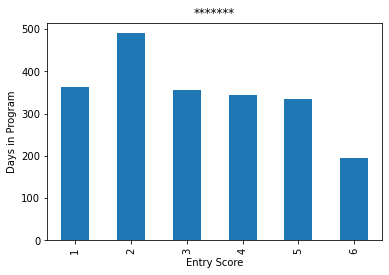

In [38]:

ssingraph = ssin.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)

ssingraph.get_legend ().remove ()

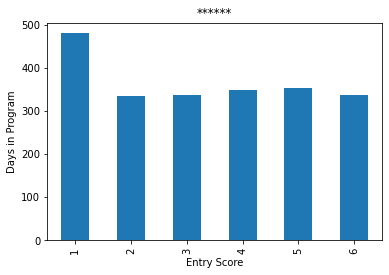

In [39]:
ksingraph = ksin.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar')

ksingraph.get_legend ().remove ()

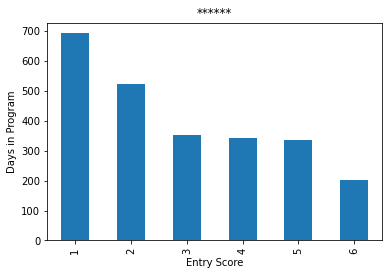

In [40]:
aasingraph = aasin.plot(x = 'entry_score',
                        y = 'time_in_program',
                        title = '******',
                        xlabel = 'Entry Score',
                        ylabel = 'Days in Program',
                        kind = 'bar')

aasingraph.get_legend ().remove ()

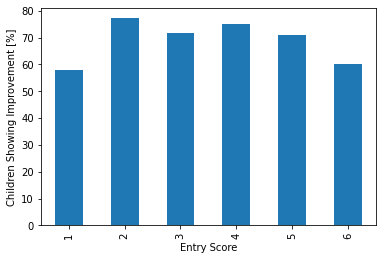

In [41]:
ssingrapha = ssin.plot(x = 'entry_score',
                      y = 'pct_of_children_improved',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Improvement [%]',
                      kind = 'bar')

ssingrapha.get_legend ().remove ()

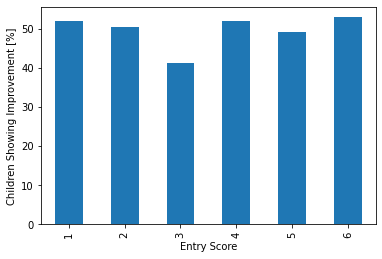

In [42]:
ksingrapha = ksin.plot(x = 'entry_score',
                      y = 'pct_of_children_improved',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Improvement [%]',
                      kind = 'bar')

ksingrapha.get_legend ().remove ()

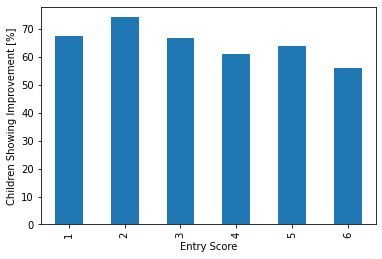

In [43]:
aasingrapha = aasin.plot(x = 'entry_score',
                      y = 'pct_of_children_improved',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Improvement [%]',
                      kind = 'bar')

aasingrapha.get_legend ().remove ()

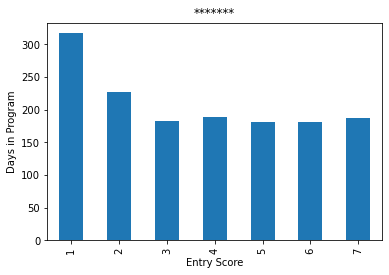

In [44]:
ssncgraph = ssnc.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)

ssncgraph.get_legend ().remove ()

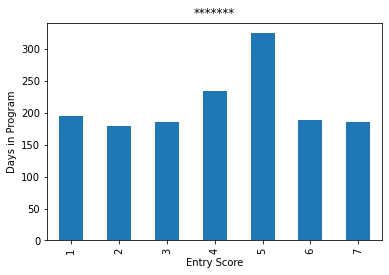

In [45]:
ksncgraph = ksnc.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)


ksncgraph.get_legend ().remove ()

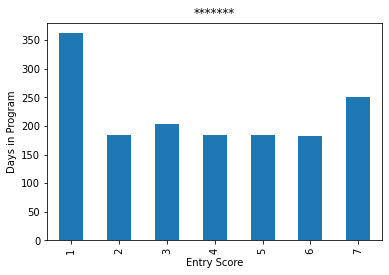

In [46]:
aasncgraph = aasnc.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)

aasncgraph.get_legend ().remove ()

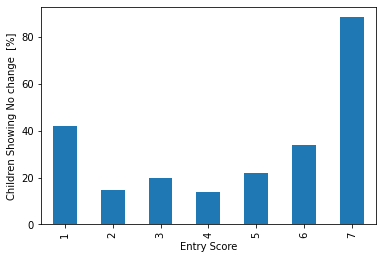

In [47]:
ssncgrapha = ssnc.plot(x = 'entry_score',
                      y = 'pct_of_children_nochange',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing No change  [%]',
                      kind = 'bar')

ssncgrapha.get_legend ().remove ()

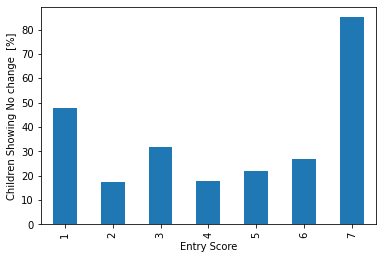

In [48]:
ksncgrapha = ksnc.plot(x = 'entry_score',
                      y = 'pct_of_children_nochange',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing No change  [%]',
                      kind = 'bar')

ksncgrapha.get_legend ().remove ()

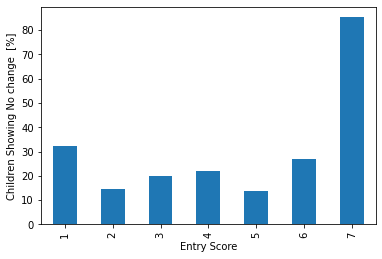

In [49]:
aasncgrapha = aasnc.plot(x = 'entry_score',
                      y = 'pct_of_children_nochange',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing No change  [%]',
                      kind = 'bar')

aasncgrapha.get_legend ().remove ()

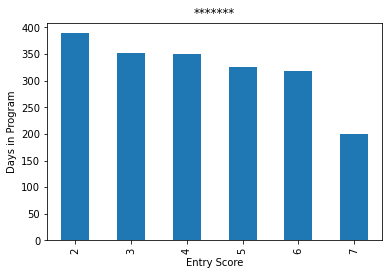

In [50]:
ssdegraph = ssde.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)

ssdegraph.get_legend ().remove ()

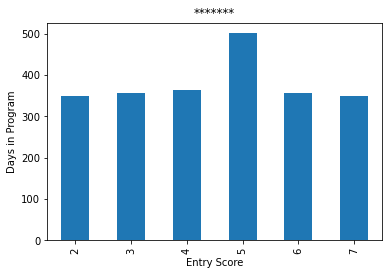

In [51]:
ksdegraph = ksde.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)

ksdegraph.get_legend ().remove ()

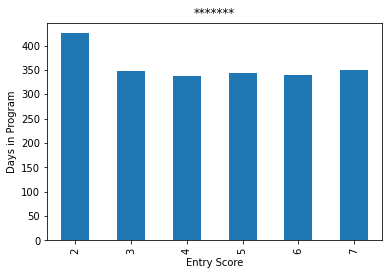

In [52]:
aasdegraph = aasde.plot(x = 'entry_score',
                      y = 'time_in_program',
                      title = '*******',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',)

aasdegraph.get_legend ().remove ()

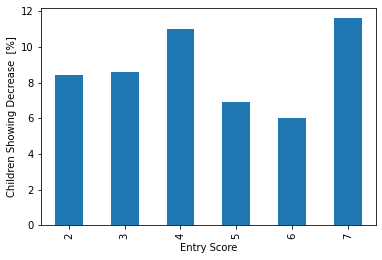

In [53]:
ssdegrapha = ssde.plot(x = 'entry_score',
                      y = 'pct_of_children_decrease',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Decrease  [%]',
                      kind = 'bar')

ssdegrapha.get_legend ().remove ()

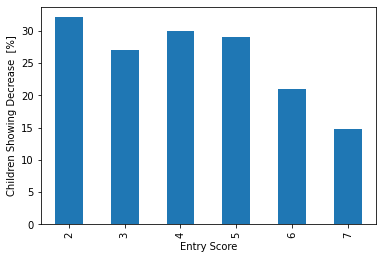

In [54]:
ksdegrapha = ksde.plot(x = 'entry_score',
                      y = 'pct_of_children_decrease',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Decrease  [%]',
                      kind = 'bar')

ksdegrapha.get_legend ().remove ()

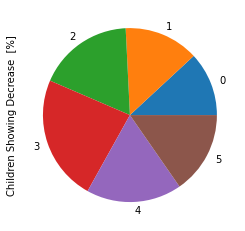

In [55]:
aasdegrapha = aasde.plot(x = 'entry_score',
                      y = 'pct_of_children_decrease',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Decrease  [%]',
                      kind = 'pie')

aasdegrapha.get_legend ().remove ()

<!-- You can select a graph below and simply call it to show the results

#Graphs for children whos entry scores increased: days in program by entry score
ssingraph # social scale
ksingraph # knowledge scale
aasingraph # appropriate action scale

#Graphs for children whos entry scores increased: percent of children with increase by entry score
ssingrapha
ksingrapha
aasingrapha

#Graphs for children whos entry scores did not change: days in program by entry score
ssncgraph
ksncgraph
aasncgraph

#Graphs for children whos entry scores did not change: percent of children with increase by entry score
ssncgrapha
ksncgrapha
aasncgrapha

#Graphs for children whos entry scores decreased: days in program by entry score
ssdegraph
ksdegraph
aasdegraph

#Graphs for children whos entry scores decreased: percent of children with increase by entry score
ssdegrapha
ksdegrapha
aasdegrapha -->

In [56]:

##You can select a graph below and simply call it to show the results

##Graphs for children whos entry scores increased: days in program by entry score
## ssingraph # social scale
## ksingraph # knowledge scale
## aasingraph # appropriate action scale

##Graphs for children whos entry scores increased: percent of children with increase by entry score
## ssingrapha
## ksingrapha
## aasingrapha

##Graphs for children whos entry scores did not change: days in program by entry score
## ssncgraph
## ksncgraph
## aasncgraph

##Graphs for children whos entry scores did not change: percent of children with increase by entry score
## ssncgrapha
## ksncgrapha
## aasncgrapha

##Graphs for children whos entry scores decreased: days in program by entry score
## ssdegraph
## ksdegraph
## aasdegraph

##Graphs for children whos entry scores decreased: percent of children with increase by entry score
## ssdegrapha
## ksdegrapha
## aasdegrapha



In [57]:
eco_exit

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,184.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,352.0
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,176.0
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,353.0


In [58]:
eco_exit.describe()

,child_id,ent_social,ent_knowledge,ent_approp_action,exit_social,exit_knowledge,exit_approp_action,days_in_program
count,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000
mean,483577.232127,3.283167,3.609684,4.022723,4.795141,4.251704,5.289285,384.229505
std,16511.095019,1.930219,1.690441,2.137700,2.128639,2.147349,2.031837,237.621979
min,440888.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-200.000000
25%,471686.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,177.000000
50%,487407.000000,3.000000,4.000000,4.000000,5.000000,4.000000,6.000000,343.000000
75%,495989.000000,5.000000,5.000000,6.000000,7.000000,6.000000,7.000000,525.000000
max,520596.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1057.000000


In [59]:
ssnc_prep = ssnc[['entry_score', 'pct_of_children_nochange']]
ssin_prep = ssin[['entry_score', 'pct_of_children_improved']]

social_inc_dec = pd.merge(ssnc_prep, ssin_prep, how = 'left', on = 'entry_score')

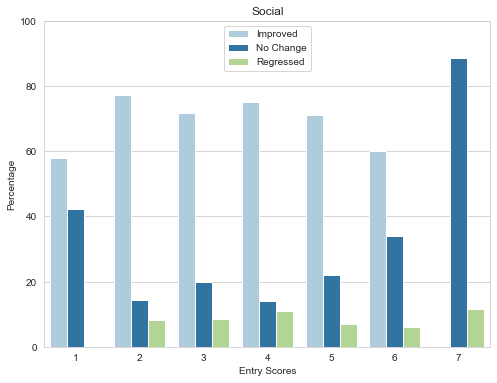

In [226]:
#chart comparing children that did not improve with children that did improve

socimp=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[57.9, 77.2, 71.6, 75.0, 71.14, 60.0, 0]})
socnc=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[42.1, 14.5, 19.8, 14.0, 21.9, 34.0, 88.4]})
socdec=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[0 , 8.2, 8.6, 11.0, 6.9, 6.0, 11.6]})
socimp['Scale']='Improved'
socnc['Scale']='No Change'
socdec['Scale']='Regressed'
res=pd.concat([socimp, socnc, socdec])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Scale', palette='Paired', ax=ax)
plt.xlabel('Entry Scores')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.title('Social')
plt.grid(axis='y')
plt.legend(loc='upper center')

plt.savefig('social_comp_final.png')
plt.show()


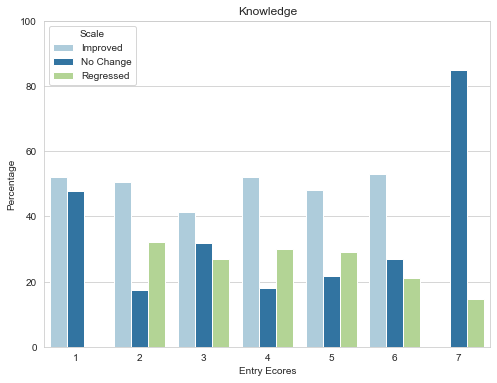

In [231]:
##Knowledge chart comparing children that did not improve with children that did improve
ymin=0
ymax=100
knowimp=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[52.1, 50.5, 41.3, 52, 48.2, 53, 0]})
knownc=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[47.9, 17.5, 31.7, 18, 21.8, 27, 85]})
knowdec=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[0 , 32.1, 27, 30, 29, 21, 14.8]})
knowimp['Scale']='Improved'
knownc['Scale']='No Change'
knowdec['Scale']='Regressed'
res=pd.concat([knowimp,knownc, knowdec])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Scale', palette='Paired', ax=ax)
plt.xlabel('Entry Ecores')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.title('Knowledge')
plt.savefig('knowledge_comp_final.png')
plt.show()

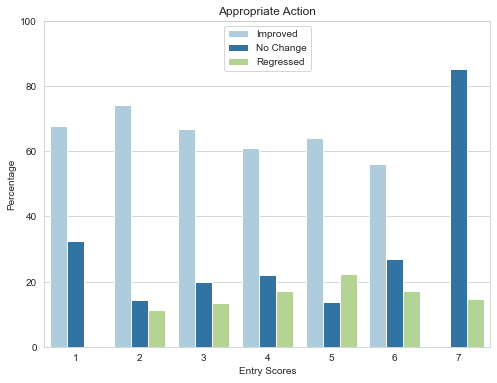

In [228]:
##Appropriate Action chart comparing children that did not improve with children that did improve

aasimp=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[67.6, 74.2, 66.9, 61, 64, 56, 0]})
aasno=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[32.4, 14.4, 19.8, 22, 13.6, 27, 85.3]})
aasdec=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[0 , 11.4, 13.3, 17, 22.4, 17, 14.7]})
aasimp['Scale']='Improved'
aasno['Scale']='No Change'
aasdec['Scale']='Regressed'
res=pd.concat([aasimp, aasno, aasdec])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Scale', palette='Paired', ax=ax)
plt.xlabel('Entry Scores')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.title('Appropriate Action')
plt.legend(loc='upper center')
plt.savefig('approriate_action_comp_final.png')
plt.show()

In [72]:
eco_exit

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,184.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,352.0
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,176.0
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,353.0


In [73]:
eco_exit['improved_social'] = ''
eco_exit['improved_knowledge'] = ''
eco_exit['improved_approp'] = ''

In [74]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_social'][x] > eco_exit['ent_social'][x]:
        eco_exit.loc[x, 'improved_social'] = 1
    else:
        eco_exit.loc[x, 'improved_social'] = 0

In [75]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_knowledge'][x] > eco_exit['ent_knowledge'][x]:
        eco_exit.loc[x, 'improved_knowledge'] = 1
    else:
        eco_exit.loc[x, 'improved_knowledge'] = 0

In [76]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_approp_action'][x] > eco_exit['ent_approp_action'][x]:
        eco_exit.loc[x, 'improved_approp'] = 1
    else:
        eco_exit.loc[x, 'improved_approp'] = 0

In [77]:
eco_exit.head()

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program,improved_social,improved_knowledge,improved_approp
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0,1,0,0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0,0,0,0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0,1,0,1
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0,1,1,1
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0,1,1,0


In [78]:
eco_exit['dec_social'] = ''
eco_exit['dec_knowledge'] = ''
eco_exit['dec_approp'] = ''

In [79]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_social'][x] < eco_exit['ent_social'][x]:
        eco_exit.loc[x, 'dec_social'] = 1
    else:
        eco_exit.loc[x, 'dec_social'] = 0

In [80]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_knowledge'][x] < eco_exit['ent_knowledge'][x]:
        eco_exit.loc[x, 'dec_knowledge'] = 1
    else:
        eco_exit.loc[x, 'dec_knowledge'] = 0

In [81]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_approp_action'][x] < eco_exit['ent_approp_action'][x]:
        eco_exit.loc[x, 'dec_approp'] = 1
    else:
        eco_exit.loc[x, 'dec_approp'] = 0

In [82]:
eco_exit.head()

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program,improved_social,improved_knowledge,improved_approp,dec_social,dec_knowledge,dec_approp
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0,1,0,0,0,0,0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0,0,0,0,0,0,0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0,1,0,1,0,0,0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0,1,1,1,0,0,0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0,1,1,0,0,0,0


In [83]:
eco_exit['same_social'] = ''
eco_exit['same_knowledge'] = ''
eco_exit['same_approp'] = ''

In [84]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_social'][x] == eco_exit['ent_social'][x]:
        eco_exit.loc[x, 'same_social'] = 1
    else:
        eco_exit.loc[x, 'same_social'] = 0

In [85]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_knowledge'][x] == eco_exit['ent_knowledge'][x]:
        eco_exit.loc[x, 'same_knowledge'] = 1
    else:
        eco_exit.loc[x, 'same_knowledge'] = 0

In [86]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_approp_action'][x] == eco_exit['ent_approp_action'][x]:
        eco_exit.loc[x, 'same_approp'] = 1
    else:
        eco_exit.loc[x, 'same_approp'] = 0

In [87]:
eco_exit.head(1)

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program,improved_social,improved_knowledge,improved_approp,dec_social,dec_knowledge,dec_approp,same_social,same_knowledge,same_approp
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0,1,0,0,0,0,0,0,1,1


In [88]:
print(sum(eco_exit['same_social'])/eco_exit['same_social'].count()*100)
print(sum(eco_exit['same_knowledge'])/eco_exit['same_knowledge'].count()*100)
print(sum(eco_exit['same_approp'])/eco_exit['same_approp'].count()*100)
print('')
print(sum(eco_exit['improved_social'])/eco_exit['improved_social'].count()*100)
print(sum(eco_exit['improved_knowledge'])/eco_exit['improved_knowledge'].count()*100)
print(sum(eco_exit['improved_approp'])/eco_exit['improved_approp'].count()*100)
print('')
print(sum(eco_exit['dec_social'])/eco_exit['dec_social'].count()*100)
print(sum(eco_exit['dec_knowledge'])/eco_exit['dec_knowledge'].count()*100)
print(sum(eco_exit['dec_approp'])/eco_exit['dec_approp'].count()*100)

31.113441705995452
30.711414088446077
34.81908757210278

62.139486103828
46.28561440307639
52.2985492046845

6.747072190176542
23.002971508477536
12.882363223212726


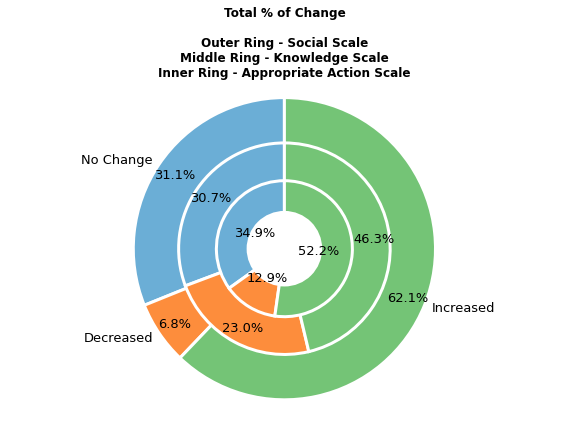

In [89]:
source_data={'students':['No Change','Decreased','Increased'],
'social_scale':[31.11,6.75,62.14],
'knowledge_scale':[30.71,23.00,46.29],
'appropriate_action_scale':[34.92,12.88,52.30]}

# Segregating the raw data into usuable form
df=pd.DataFrame(source_data,columns=
['students','social_scale','knowledge_scale','appropriate_action_scale'])
# df['cumulative_score']=df['social_scale']+df['knowledge_scale']
# +df['appropriate_action_scale']

# Seperating the sub-parts of the given data
x1= df.iloc[0:3,1]
x2= df.iloc[0:3,2]
x3= df.iloc[0:3,3]

# Setting figure colors
cmap = plt.get_cmap("tab20c")
# outer_colors = cmap(np.arange(3)*4)
outer_colors = cmap(np.array([1,5,9]))
inner_colors = cmap(np.array([1,5,9]))
inner_colors1 = cmap(np.array([1,5,9]))
# Setting the size of the figure
plt.figure(figsize=(8,6))

# Plotting the outer pie
plt.pie(x1, labels = df.iloc[0:3, 0], 
       startangle=90, pctdistance =0.88 ,colors=outer_colors,
       autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
       textprops ={'fontsize':13},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# PLotting the inner pie
plt.pie(x2,startangle=90, pctdistance =.85,colors=inner_colors,
        autopct = '%1.1f%%',radius= 0.70,
       textprops ={'fontsize':13}, 
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# PLotting the inner pie2
plt.pie(x3,startangle=90, pctdistance =.50,colors=inner_colors1,
        autopct = '%1.1f%%',radius= 0.45,
        textprops ={'fontsize':13}, 
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
# 'fontweight': 'bold' ,
# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
# plt.legend(loc=3, fontsize =10)
# plt.legend(['Outer Ring (Social Scale)', 'Middle Ring (Knowledge Scale)', 'Inner Ring (Appropriate Action Scale)'])
plt.title('Total % of Change\n\nOuter Ring - Social Scale\nMiddle Ring - Knowledge Scale\nInner Ring - Appropriate Action Scale', fontweight='bold')
plt.tight_layout()
plt.savefig('total-percent-comparison.png')
plt.show()

In [90]:
##create new column in your dataframe
##df['improved'] = ''

##for loop to iterate of entire data set. Prints a 1 or 0 in the new column depending on if there was improvement or not
##for x, y in df.iterrows():
    ##if df['avg_ent'][x] < eco_exit['avg_exit'][x]: 
        ##eco_exit.loc[x, 'improved'] = 1
   ## else:
        ##eco_exit.loc[x, 'improved'] = 0
        
##then perform calculation on new column
##this will figure the percentage that improved by adding all the 1s
##sum(df['improved'])/df['improved'].count()*100


##you can do the same thing for decrease. Make a new column to represent the decrease, then flip the comparison operator
##in the for loop

In [91]:
eco_exit.head()

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,days_in_program,improved_social,improved_knowledge,improved_approp,dec_social,dec_knowledge,dec_approp,same_social,same_knowledge,same_approp
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,183.0,1,0,0,0,0,0,0,1,1
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,514.0,0,0,0,0,0,0,1,1,1
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,1026.0,1,0,1,0,0,0,0,1,0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,175.0,1,1,1,0,0,0,0,0,0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,348.0,1,1,0,0,0,0,0,0,1


In [92]:
eco_exit['months_in_program'] = (eco_exit['days_in_program']/30).astype(int)
eco_exit

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,improved_social,improved_knowledge,improved_approp,dec_social,dec_knowledge,dec_approp,same_social,same_knowledge,same_approp,months_in_program
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,0,0,0,0,0,0,1,1,6
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,0,0,0,0,0,0,1,1,1,17
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,0,1,0,0,0,0,1,0,34
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1,1,1,0,0,0,0,0,0,5
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,1,1,0,0,0,0,0,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,...,0,1,0,0,0,0,1,0,1,6
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1,1,1,0,0,0,0,0,0,11
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1,1,1,0,0,0,0,0,0,5
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1,1,1,0,0,0,0,0,0,11


In [93]:
eco_exit.describe()

,child_id,ent_social,ent_knowledge,ent_approp_action,exit_social,exit_knowledge,exit_approp_action,days_in_program,months_in_program
count,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000
mean,483577.232127,3.283167,3.609684,4.022723,4.795141,4.251704,5.289285,384.229505,12.313407
std,16511.095019,1.930219,1.690441,2.137700,2.128639,2.147349,2.031837,237.621979,7.932903
min,440888.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-200.000000,-6.000000
25%,471686.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,177.000000,5.000000
50%,487407.000000,3.000000,4.000000,4.000000,5.000000,4.000000,6.000000,343.000000,11.000000
75%,495989.000000,5.000000,5.000000,6.000000,7.000000,6.000000,7.000000,525.000000,17.000000
max,520596.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1057.000000,35.000000


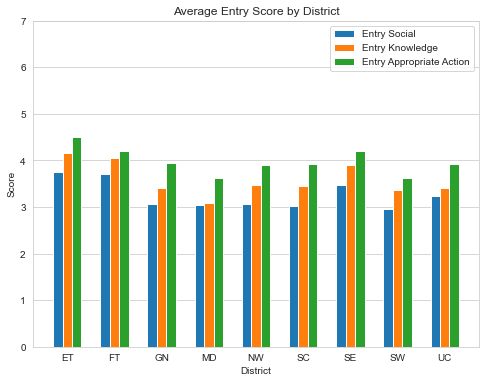

In [237]:
x = np.arange(9)
y1 = [3.741709, 3.704778, 3.071645, 3.044177, 3.058296, 3.013786, 3.479915, 2.964706, 3.238189]
y2 = [4.157789, 4.052901, 3.403633, 3.076305, 3.470852, 3.457052, 3.909091, 3.368627, 3.397638]
y3 = [4.497487, 4.192833, 3.940464, 3.619813, 3.892377, 3.923648, 4.200846, 3.623529, 3.925197]
width = .2
plt.figure(figsize=(8,6))
plt.bar(x-0.2, y1, width, color='tab:blue')
plt.bar(x, y2, width, color='tab:orange')
plt.bar(x+0.2, y3, width, color='tab:green')
plt.title('Average Entry Score by District')
plt.xticks(x, ['ET', 'FT', 'GN', 'MD', 'NW', 'SC', 'SE', 'SW', 'UC'])
plt.xlabel("District")
plt.ylabel("Score")
plt.ylim(0, 7)
plt.legend(["Entry Social", "Entry Knowledge", "Entry Appropriate Action"])
plt.grid(axis='x')
plt.savefig('avg_entry_district.png')
plt.show()

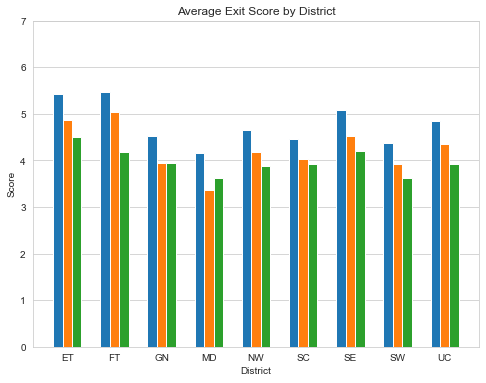

In [238]:
x = np.arange(9)
y1 = [5.42, 5.47, 4.53, 4.16, 4.66, 4.46, 5.08, 4.37, 4.85]
y2 = [4.87, 5.04, 3.95, 3.37, 4.18, 4.03, 4.52, 3.93, 4.35]
y3 = [4.50, 4.19, 3.94, 3.62, 3.89, 3.92, 4.20, 3.62, 3.93]
width = .2
plt.figure(figsize=(8,6))
plt.bar(x-0.2, y1, width, color='tab:blue')
plt.bar(x, y2, width, color='tab:orange')
plt.bar(x+0.2, y3, width, color='tab:green')
plt.title('Average Exit Score by District')
plt.xticks(x, ['ET', 'FT', 'GN', 'MD', 'NW', 'SC', 'SE', 'SW', 'UC'])
plt.xlabel("District")
plt.ylabel("Score")
plt.ylim(0, 7)
plt.grid(axis='x')
plt.savefig('avg_exit_district.png')
plt.show()

In [122]:
eco_exit.sort_values(by='days_in_program', ascending=True)
eco_exit

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,improved_social,improved_knowledge,improved_approp,dec_social,dec_knowledge,dec_approp,same_social,same_knowledge,same_approp,months_in_program
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,0,0,0,0,0,0,1,1,6
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,0,0,0,0,0,0,1,1,1,17
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,0,1,0,0,0,0,1,0,34
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1,1,1,0,0,0,0,0,0,5
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,1,1,0,0,0,0,0,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,...,0,1,0,0,0,0,1,0,1,6
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1,1,1,0,0,0,0,0,0,11
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1,1,1,0,0,0,0,0,0,5
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1,1,1,0,0,0,0,0,0,11


In [135]:
eco_exit2 = eco_exit[['child_id', 'ent_social', 'ent_knowledge', 'ent_approp_action', 'exit_social', 'exit_knowledge', 'exit_approp_action', 'days_in_program', 'months_in_program']]


In [136]:
eco_exit2

,child_id,ent_social,ent_knowledge,ent_approp_action,exit_social,exit_knowledge,exit_approp_action,days_in_program,months_in_program
0,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,183.0,6
1,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,514.0,17
3,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1026.0,34
5,494216.0,2.0,4.0,6.0,4.0,5.0,7.0,175.0,5
6,449725.0,4.0,5.0,7.0,7.0,7.0,7.0,348.0,11
...,...,...,...,...,...,...,...,...,...
8624,490337.0,3.0,1.0,1.0,3.0,3.0,1.0,184.0,6
8626,483729.0,1.0,3.0,2.0,6.0,6.0,6.0,352.0,11
8627,485978.0,1.0,3.0,5.0,5.0,7.0,7.0,176.0,5
8628,488802.0,4.0,4.0,3.0,6.0,7.0,7.0,353.0,11


In [137]:
#create columns for average entrance, ecit, and days
eco_exit2['avg_ent'] = eco_exit2[['ent_social','ent_knowledge', 'ent_approp_action' ]].mean(axis=1)
eco_exit2['avg_exit'] = eco_exit2[['exit_social','exit_knowledge', 'exit_approp_action' ]].mean(axis=1)
eco_exit2['avg_days'] = eco_exit2[['days_in_program' ]].mean(axis=1)
eco_exit2.head()

C:\Users\jamor\AppData\Local\Temp/ipykernel_22344/137326999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_exit2['avg_ent'] = eco_exit2[['ent_social','ent_knowledge', 'ent_approp_action' ]].mean(axis=1)
C:\Users\jamor\AppData\Local\Temp/ipykernel_22344/137326999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_exit2['avg_exit'] = eco_exit2[['exit_social','exit_knowledge', 'exit_approp_action' ]].mean(axis=1)
C:\Users\jamor\AppData\Local\Temp/ipykernel_22344/137326999.py:4: SettingWithCopyWar

,child_id,ent_social,ent_knowledge,ent_approp_action,exit_social,exit_knowledge,exit_approp_action,days_in_program,months_in_program,avg_ent,avg_exit,avg_days
0,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,183.0,6,4.000000,4.333333,183.0
1,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,514.0,17,7.000000,7.000000,514.0
3,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1026.0,34,2.666667,4.333333,1026.0
5,494216.0,2.0,4.0,6.0,4.0,5.0,7.0,175.0,5,4.000000,5.333333,175.0
6,449725.0,4.0,5.0,7.0,7.0,7.0,7.0,348.0,11,5.333333,7.000000,348.0


In [138]:
##somehow use this chart to plot change based on time in program.....
##how long is each entry rating in the program?




,child_id,ent_social,ent_knowledge,ent_approp_action,exit_social,exit_knowledge,exit_approp_action,days_in_program,months_in_program,avg_ent,avg_exit,avg_days
child_id,1.000000,0.231049,0.064568,0.351167,-0.038828,0.015458,0.042659,-0.761234,-0.760812,0.263020,0.006433,-0.761234
ent_social,0.231049,1.000000,0.566779,0.704312,0.598923,0.449004,0.483674,-0.265401,-0.265576,0.885034,0.556866,-0.265401
ent_knowledge,0.064568,0.566779,1.000000,0.551266,0.469600,0.545963,0.467207,-0.048622,-0.048942,0.798213,0.539489,-0.048622
ent_approp_action,0.351167,0.704312,0.551266,1.000000,0.443619,0.349136,0.507370,-0.397658,-0.397963,0.892109,0.470982,-0.397658
exit_social,-0.038828,0.598923,0.469600,0.443619,1.000000,0.729412,0.809646,0.104289,0.104797,0.583763,0.922982,0.104289
exit_knowledge,0.015458,0.449004,0.545963,0.349136,0.729412,1.000000,0.748433,0.025226,0.025131,0.510794,0.902360,0.025226
exit_approp_action,0.042659,0.483674,0.467207,0.507370,0.809646,0.748433,1.000000,0.008097,0.007997,0.565590,0.926857,0.008097
days_in_program,-0.761234,-0.265401,-0.048622,-0.397658,0.104289,0.025226,0.008097,1.000000,0.999275,-0.290964,0.050576,1.000000
months_in_program,-0.760812,-0.265576,-0.048942,-0.397963,0.104797,0.025131,0.007997,0.999275,1.000000,-0.291272,0.050693,0.999275
avg_ent,0.263020,0.885034,0.798213,0.892109,0.583763,0.510794,0.565590,-0.290964,-0.291272,1.000000,0.602990,-0.290964


In [146]:
eco_exit.loc[eco_exit['ent_social']==1, 'days_in_program'].mean()

414.2544608223429

In [147]:
eco_exit.loc[eco_exit['ent_social']==2, 'days_in_program'].mean()

484.3529971455756

In [148]:
eco_exit.loc[eco_exit['ent_social']==3, 'days_in_program'].mean()

409.71037811745776

In [149]:
eco_exit.loc[eco_exit['ent_social']==4, 'days_in_program'].mean()

350.85283018867926

In [150]:
eco_exit.loc[eco_exit['ent_social']==5, 'days_in_program'].mean()

319.14506172839504

In [151]:
eco_exit.loc[eco_exit['ent_social']==6, 'days_in_program'].mean()

261.10791366906477

In [152]:
eco_exit.loc[eco_exit['ent_social']==7, 'days_in_program'].mean()

265.63167587476977

In [154]:
soc_avg_days = pd.DataFrame([[1, 414.25], [2, 484.35], [3, 409.71], [4, 350.85], [5, 319.14], [6, 261.11], [7, 265.63]],
                            columns=['rating', 'soc_avg_days'])

In [155]:
soc_avg_days

,rating,avg_days
0,1,414.25
1,2,484.35
2,3,409.71
3,4,350.85
4,5,319.14
5,6,261.11
6,7,265.63


In [157]:
print(eco_exit.loc[eco_exit['ent_knowledge']==1, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_knowledge']==2, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_knowledge']==3, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_knowledge']==4, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_knowledge']==5, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_knowledge']==6, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_knowledge']==7, 'days_in_program'].mean())
print('')
print('APPROP ACTION')
print(eco_exit.loc[eco_exit['ent_approp_action']==1, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_approp_action']==2, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_approp_action']==3, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_approp_action']==4, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_approp_action']==5, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_approp_action']==6, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['ent_approp_action']==7, 'days_in_program'].mean())

429.78218884120173
380.08253358925145
339.07698001480384
392.38318777292574
422.6236641221374
357.9836065573771
286.3068181818182

APPROP ACTION
550.6719056974459
489.05547850208046
389.27312138728325
346.3538633818589
319.5869565217391
274.4977843426883
293.5516934046346


In [158]:
dd = {'rating':[1,2,3,4,5,6,7],
      'soc_days':[414.25, 484.35, 409.71, 350.85, 319.14, 261.11, 265.63],
      'knowl_days':[429.78, 380.08, 339.08, 392.38, 422.62, 357.98, 286.31],
      'approp_act_days':[550.67, 489.06, 389.27, 346.35, 319.59, 274.50, 293.55] }

avg_days_chart = pd.DataFrame(data=dd)
avg_days_chart

,rating,soc_days,knowl_days,approp_act_days
0,1,414.25,429.78,550.67
1,2,484.35,380.08,489.06
2,3,409.71,339.08,389.27
3,4,350.85,392.38,346.35
4,5,319.14,422.62,319.59
5,6,261.11,357.98,274.50
6,7,265.63,286.31,293.55


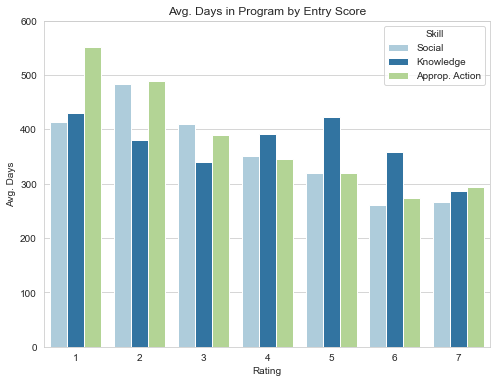

In [232]:
avgsoc = pd.DataFrame({'x':[1,2,3,4,5,6,7],
                       'y':[414.25, 484.35, 409.71, 350.85, 319.14, 261.11, 265.63]})
avgknowl = pd.DataFrame({'x':[1,2,3,4,5,6,7],
                         'y':[429.78, 380.08, 339.08, 392.38, 422.62, 357.98, 286.31]})
avgapprop = pd.DataFrame({'x':[1,2,3,4,5,6,7],
                          'y':[550.67, 489.06, 389.27, 346.35, 319.59, 274.50, 293.55]})

avgsoc['Skill']='Social'
avgknowl['Skill']='Knowledge'
avgapprop['Skill']='Approp. Action'
res=pd.concat([avgsoc, avgknowl, avgapprop])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Skill', palette='Paired', ax=ax)
plt.xlabel('Rating')
plt.ylabel('Avg. Days')
plt.ylim(0, 600)
plt.title('Avg. Days in Program by Entry Score')
plt.savefig('avg_days_by_entry.png')
plt.show()



In [180]:
print('SOCIAL')
print(eco_exit.loc[eco_exit['exit_social']==1, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_social']==2, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_social']==3, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_social']==4, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_social']==5, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_social']==6, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_social']==7, 'days_in_program'].mean())
print('')
print('KNOWLEDGE')
print(eco_exit.loc[eco_exit['exit_knowledge']==1, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_knowledge']==2, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_knowledge']==3, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_knowledge']==4, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_knowledge']==5, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_knowledge']==6, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_knowledge']==7, 'days_in_program'].mean())
print('')
print('APPROP ACTION')
print(eco_exit.loc[eco_exit['exit_approp_action']==1, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_approp_action']==2, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_approp_action']==3, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_approp_action']==4, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_approp_action']==5, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_approp_action']==6, 'days_in_program'].mean())
print(eco_exit.loc[eco_exit['exit_approp_action']==7, 'days_in_program'].mean())

SOCIAL
377.8391812865497
336.9828431372549
343.992795389049
349.6294642857143
368.38732394366195
385.9204301075269
425.78234975636167

KNOWLEDGE
417.73434343434343
364.26541554959783
361.22736842105263
348.0701468189233
343.35055350553506
361.1990811638591
434.3182844243792

APPROP ACTION
456.33264462809916
356.2315436241611
351.71889400921657
350.2584933530281
335.1658536585366
354.0
405.29938744257277


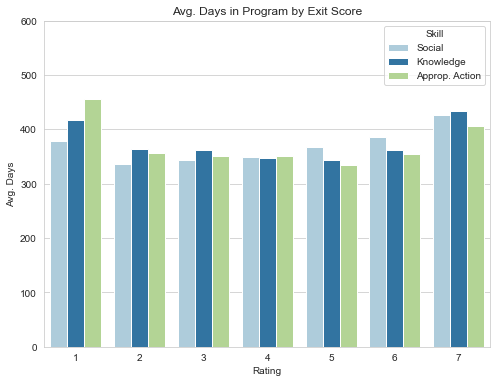

In [233]:
avgsocex = pd.DataFrame({'x':[1,2,3,4,5,6,7],
                       'y':[377.84, 336.98, 343.99, 349.63, 368.39, 385.92, 425.78]})
avgknowlex = pd.DataFrame({'x':[1,2,3,4,5,6,7],
                         'y':[417.73, 364.27, 361.23, 348.07, 343.35, 361.20, 434.32]})
avgappropex = pd.DataFrame({'x':[1,2,3,4,5,6,7],
                          'y':[456.33, 356.23, 351.72, 350.26, 335.17, 354.00, 405.30]})

avgsocex['Skill']='Social'
avgknowlex['Skill']='Knowledge'
sns.set_style('whitegrid')
avgappropex['Skill']='Approp. Action'
res=pd.concat([avgsocex, avgknowlex, avgappropex])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Skill', palette='Paired', ax=ax)
plt.xlabel('Rating')
plt.ylabel('Avg. Days')
plt.ylim(0, 600)
plt.title('Avg. Days in Program by Exit Score')
plt.savefig('avg_days_by_exit.png')
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

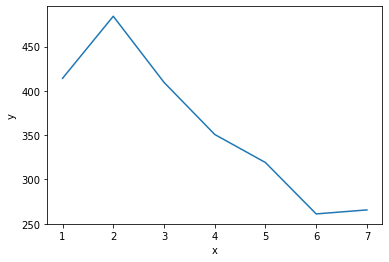

In [193]:
sns.lineplot(data = avgsoc, x='x', y='y')

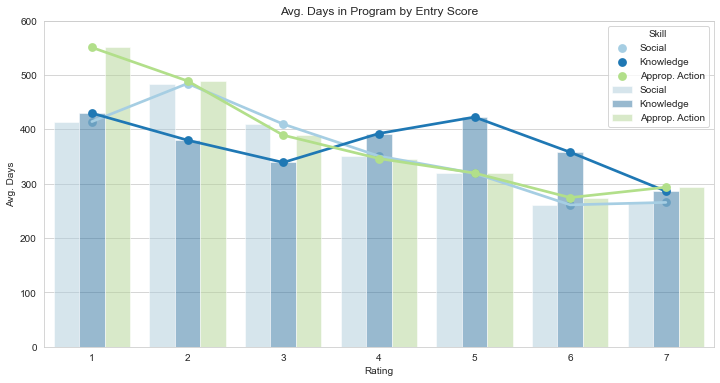

In [199]:
avgsoc['Skill']='Social'
avgknowl['Skill']='Knowledge'
avgapprop['Skill']='Approp. Action'
res=pd.concat([avgsoc, avgknowl, avgapprop])
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(12,6))
sns.pointplot(data = res, x='x', y='y', hue='Skill', kind='point', palette='Paired')
sns.barplot(x='x',y='y',data=res,hue='Skill', palette='Paired', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Avg. Days')
plt.ylim(0, 600)
##plt.grid(axis='y')
plt.title('Avg. Days in Program by Entry Score')
plt.savefig('avg_days_by_entry_comp.png')
plt.show()



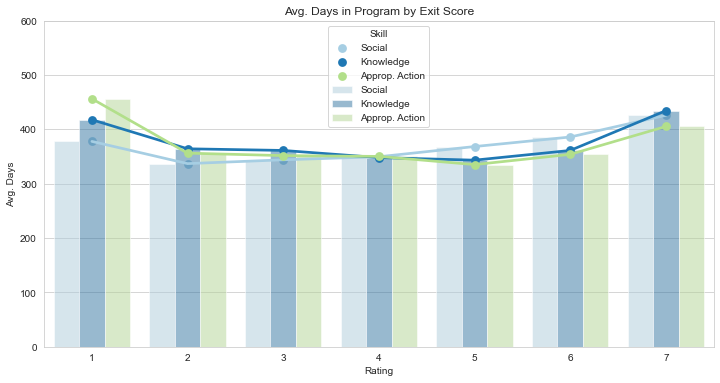

In [205]:
avgsocex['Skill']='Social'
avgknowlex['Skill']='Knowledge'
avgappropex['Skill']='Approp. Action'
res=pd.concat([avgsocex, avgknowlex, avgappropex])
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(12,6))
sns.pointplot(data = res, x='x', y='y', hue='Skill', kind='point', palette='Paired')
sns.barplot(x='x',y='y',data=res,hue='Skill', palette='Paired', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Avg. Days')
plt.ylim(0, 600)
##plt.grid(axis='y')
plt.title('Avg. Days in Program by Exit Score')
##plt.legend([],[], frameon=False)
plt.savefig('avg_days_by_exit_comp.png')
plt.show()